In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

%matplotlib inline

## Load data

In [2]:
df = pd.read_csv("./data/wdbc.csv")
df.shape

(569, 32)

In [3]:
df.head(5)

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,conc_points,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,conc_points_worst,symmetry_worst,fract_dim_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Question 1: Find mean, median and standard deviation for "perimeter'

In [4]:
perimeter_df = df[df.columns[4]] 
perimeter_df.head(3)

0    122.8
1    132.9
2    130.0
Name: perimeter, dtype: float64

## Mean value


In [5]:
np.mean(perimeter_df)

91.96903339191566

## Median value

In [6]:
np.median(perimeter_df)

86.24

## Standart deviation

In [7]:
np.std(perimeter_df)

24.277619293053174

Graph below confirm that our median and mean value correct.

## Graphs

In [8]:
def plot_data(df, name, size=11):
    plt.hist(df, bins=50)
    plt.title(name + " distribution")
    plt.xlabel(name)
    plt.ylabel("Frequency")
    plt.show()

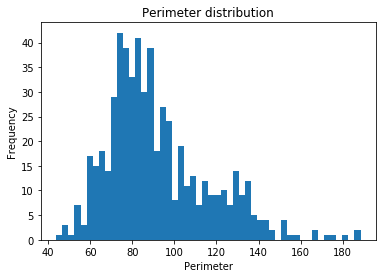

In [9]:
plot_data(perimeter_df,"Perimeter")

Perimeter distribution graph confirm that our median and mean value correct.



# Question 2: is Radius normally distributed?

In [10]:
radius_df = df[df.columns[2]] 
radius_df.head(4)

0    17.99
1    20.57
2    19.69
3    11.42
Name: radius, dtype: float64

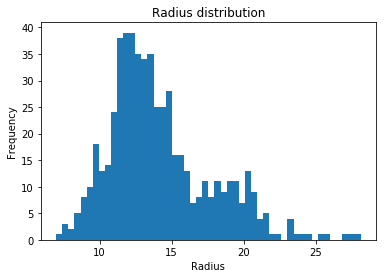

In [11]:
plot_data(radius_df,"Radius")

Graph for normal distributed data:
    

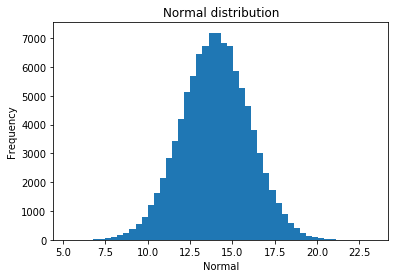

In [12]:
s = np.random.normal(14, 2, 100000)
plot_data(s,"Normal")

I am not sure that automacit way to detect type of distribution exists.    Radius value doesn't look like normal distribution on this graph. But despite of this fact i think 

Possible distribution: normal distribution


# Question 3: Train a classifier and compare two classifiers

Splitting the data
70% for training , 30% for testing

In [13]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['radius','texture','perimeter','area','smoothness','compactness','concavity','conc_points','symmetry']
predicted_class_names = ['diagnosis']

X = df[feature_col_names].values  
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 3.001e-01 1.471e-01 2.419e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 8.690e-02 7.017e-02 1.812e-01]
 [1.969e+01 2.125e+01 1.300e+02 ... 1.974e-01 1.279e-01 2.069e-01]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 9.251e-02 5.302e-02 1.590e-01]
 [2.060e+01 2.933e+01 1.401e+02 ... 3.514e-01 1.520e-01 2.397e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 0.000e+00 1.587e-01]]


/home/vlad/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
y = df[predicted_class_names].values 
split_test_size = 0.30

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 

In [16]:
print(X_train)
print(X_test)

[[1.374e+01 1.791e+01 8.812e+01 ... 2.881e-02 1.329e-02 1.473e-01]
 [1.337e+01 1.639e+01 8.610e+01 ... 8.092e-02 2.800e-02 1.422e-01]
 [1.469e+01 1.398e+01 9.822e+01 ... 1.450e-01 6.300e-02 2.086e-01]
 ...
 [1.429e+01 1.682e+01 9.030e+01 ... 7.250e-03 6.250e-03 1.508e-01]
 [1.398e+01 1.962e+01 9.112e+01 ... 1.126e-01 6.463e-02 1.669e-01]
 [1.218e+01 2.052e+01 7.722e+01 ... 2.383e-02 1.770e-02 1.739e-01]]
[[1.247e+01 1.860e+01 8.109e+01 ... 8.005e-02 3.821e-02 1.925e-01]
 [1.894e+01 2.131e+01 1.236e+02 ... 1.080e-01 7.951e-02 1.582e-01]
 [1.546e+01 1.948e+01 1.017e+02 ... 1.466e-01 8.087e-02 1.931e-01]
 ...
 [9.904e+00 1.806e+01 6.460e+01 ... 1.307e-01 3.716e-02 1.669e-01]
 [1.382e+01 2.449e+01 9.233e+01 ... 1.357e-01 6.759e-02 2.275e-01]
 [1.289e+01 1.411e+01 8.495e+01 ... 1.374e-01 3.980e-02 1.596e-01]]


In [17]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.95% in training set
30.05% in test set


In [18]:
df['diagnosis']

0      M
1      M
2      M
3      M
4      M
5      M
6      M
7      M
8      M
9      M
10     M
11     M
12     M
13     M
14     M
15     M
16     M
17     M
18     M
19     B
20     B
21     B
22     M
23     M
24     M
25     M
26     M
27     M
28     M
29     M
      ..
539    B
540    B
541    B
542    B
543    B
544    B
545    B
546    B
547    B
548    B
549    B
550    B
551    B
552    B
553    B
554    B
555    B
556    B
557    B
558    B
559    B
560    B
561    B
562    M
563    M
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [29]:
print("Original Malignant  : {0} ({1:0.2f}%)".format(len(df.loc[df['diagnosis'] == 'M']), (len(df.loc[df['diagnosis'] == 'M'])/len(df.index)) * 100.0))
print("Original Benign : {0} ({1:0.2f}%)".format(len(df.loc[df['diagnosis'] == 'B']), (len(df.loc[df['diagnosis'] == 'B'])/len(df.index)) * 100.0))


Original Malignant  : 212 (37.26%)
Original Benign : 357 (62.74%)


In [30]:
print("")
print("Training Malignant  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 'M']), (len(y_train[y_train[:] == 'M'])/len(y_train) * 100.0)))
print("Training Benign : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 'B']), (len(y_train[y_train[:] == 'B'])/len(y_train) * 100.0)))
print("")
print("Test Malignant      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 'M']), (len(y_test[y_test[:] == 'M'])/len(y_test) * 100.0)))
print("Test Benign     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 'B']), (len(y_test[y_test[:] == 'B'])/len(y_test) * 100.0)))



Training Malignant  : 149 (37.44%)
Training Benign : 249 (62.56%)

Test Malignant      : 63 (36.84%)
Test Benign     : 108 (63.16%)


## Training on Naive Baes algo

In [21]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

## Performance on training data

In [22]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.9095



## performance on testing data

In [23]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.9298


# Metrics 

In [26]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[104   4]
 [  8  55]]

Classification Report
             precision    recall  f1-score   support

          B       0.93      0.96      0.95       108
          M       0.93      0.87      0.90        63

avg / total       0.93      0.93      0.93       171



## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.9240
[[103   5]
 [  8  55]]

Classification Report
             precision    recall  f1-score   support

          B       0.93      0.95      0.94       108
          M       0.92      0.87      0.89        63

avg / total       0.92      0.92      0.92       171

